In [481]:
using Plots
include("coupled_genetic_model.jl")
include("demo_params.jl")
include("../age_structure/full_trait_distribution.jl")

Main.full_trait_distribution

# Simulations 

The module `coupled_genetic_model.jl` contains function that generate instances of the population objected defined in `full_trait_distribution.jl` module with demogrphi paramters discussed in `tests_demo_params.ipynb`. These model objects can be used to simulate the joint demographic and genetic dynamics of the population. 

The `init_model*` function allow the models to be initialized for differnt values of theree key paramters, the strength of stabalizing selection, the reletive fitness of the hatchery population  and the Goodyear compensation ratio.

The code chunks below initalize a model with the *Smyth et. al. 2016* parameter set, seleciton strength of $0.1$, reletive fittenss of $0.5$ and a good year compensation ratio of $3$. The popualtion dynamics are simulated for 10 generations. Starting in the second generation $25\%$ of the recruits are from hatcheyr releases. After the second generation the hatchery releases stop and the abundance and fittness of the popualtion are projected forward seven generations to show how quickly the genetic load is shed. 

In [488]:
# initalize model
function init_pop(s,RRS, K_ind)
    pop, dsn_im = coupled_genetic_model.init_model1(s,RRS,K_ind)

    T_ = floor(Int, demo_params.Smyth_2016_T1)
    N = 30*T_
    for t in 1:N
        pop, R = coupled_genetic_model.update_DSI!(pop, 0, dsn_im)
    end 
    return pop, dsn_im, T_
end 


init_pop (generic function with 1 method)

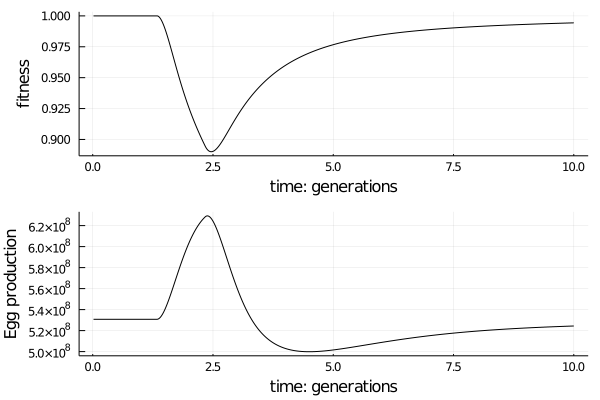

In [489]:
s = 0.1
RRS = 0.25
k_ind = 2

pop, dsn_im, T_ = init_pop(s,RRS, k_ind)

N = 10*T_
W = zeros(N)
E_ = zeros(N)
R_im = vcat(repeat([0], T_), repeat([0.25], 1*T_), repeat([0.0], 18*T_)) .* demo_params.Smyth_16_R_star
    
for t in 1:N
    pop, R = coupled_genetic_model.update_DSI!(pop, R_im[t], dsn_im)
    W[t] = full_trait_distribution.fittness(pop)
    x = sum(pop.abundance.*pop.fecundity)
    E_[t] = x
end 


p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = "black", xlab = "time: generations", ylab = "fitness", label = "")
p2 = Plots.plot((1:N) ./ T_ ,E_, color = "black", xlab = "time: generations", ylab = "Egg production", label = "")
plot(p1,p2, layout = (2,1))

In [471]:
65/68

0.9558823529411765

## Effect of paramters

To see how key unknown parameters determine the fitness effects of the hatchery we can run similar simualtions for differnt levels of that key parmaters and plot the corresponding output. 


In [457]:
function simulaiton(R_im, duratation, s, RRS, k_ind)

    pop, dsn_im, T_ = init_pop(s,RRS, k_ind)

    N = 10*T_
    W = zeros(N)
    E_ = zeros(N)
    R_im = vcat(repeat([0], T_), repeat([R_im], floor(Int,duratation*T_)), repeat([0.0], 18*T_))

    for t in 1:N
        pop, R = coupled_genetic_model.update_DSI!(pop, R_im[t], dsn_im)
        W[t] = full_trait_distribution.fittness(pop)
        E_[t] = sum(pop.abundance.*pop.fecundity)
    end 
    return W, E_
end 


function simulaiton_long(R_im, duratation, s, RRS, k_ind)

    pop, dsn_im, T_ = init_pop(s,RRS, k_ind)
    
    N = 50*T_
    W = zeros(N)
    E_ = zeros(N)
    R_im = vcat(repeat([0], T_), repeat([R_im], floor(Int,duratation*T_)), repeat([0.0], 50*T_))

    for t in 1:N
        pop, R = coupled_genetic_model.update_DSI!(pop, R_im[t], dsn_im)
        W[t] = full_trait_distribution.fittness(pop)
        E_[t] = sum(pop.abundance.*pop.fecundity)
    end 
    return W, E_
end 

simulaiton_long (generic function with 1 method)

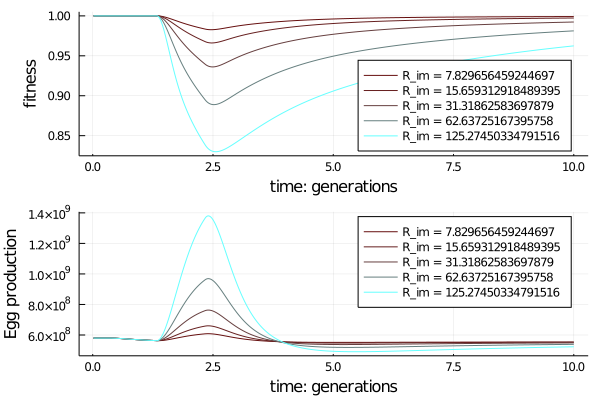

In [458]:
s = 0.1
RRS = 0.7
k_ind = 3
R_im = [0.125,0.25,0.5,1.0,2.0].* demo_params.Smyth_16_R_star
n_k = length(R_im)
duratation = 1
W,E = simulaiton(R_im[1], duratation, s, RRS, k_ind)
N = length(W)
p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,R_im[1]/R_im[n_k],R_im[1]/R_im[n_k]),
                xlab = "time: generations", ylab = "fitness", label = string("R_im = ", R_im[1]))
p2 = Plots.plot((1:N) ./ T_ ,E, color = RGB(0.4,R_im[1]/R_im[n_k],R_im[1]/R_im[n_k]), 
                xlab = "time: generations", ylab = "Egg production", label = string("R_im = ", R_im[1]))

for i in 2:n_k
    W,E = simulaiton(R_im[i], duratation, s, RRS, k_ind)
    N = length(W)
    Plots.plot!(p1,(1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,R_im[i]/R_im[n_k],R_im[i]/R_im[n_k]),
                    xlab = "time: generations", ylab = "fitness", label = string("R_im = ", R_im[i]),
                    legend = :bottomright)
    Plots.plot!(p2,(1:N) ./ T_ ,E, color = RGB(0.4,R_im[i]/R_im[n_k],R_im[i]/R_im[n_k]), 
                    xlab = "time: generations", ylab = "Egg production", label = string("R_im = ", R_im[i]))
end 
plot(p1,p2, layout = (2, 1))

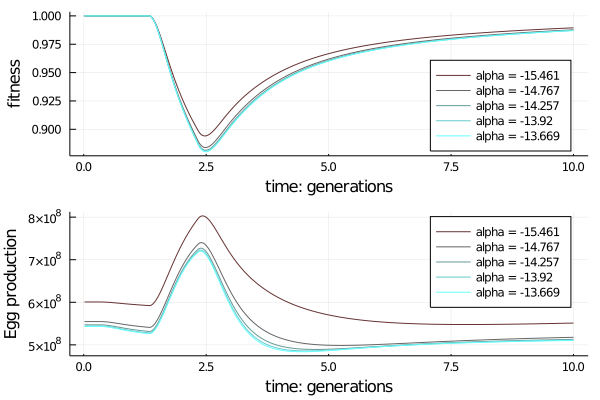

In [406]:
s = 0.1
RRS = 0.5
k_ind = [1,2,3,4,5]
R_im = 0.5.* demo_params.Smyth_16_R_star
n_k = length(k_ind)
duratation = 1
W,E = simulaiton(R_im, duratation, s, RRS, k_ind[1])
N = length(W)
col = k_ind[1]/k_ind[n_k]
p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col,col),
                xlab = "time: generations", ylab = "fitness", 
                label = string("alpha = ", round(log(demo_params.Smyth_2016_alpha[k_ind[1]]),digits =3)))
p2 = Plots.plot((1:N) ./ T_ ,E, color = RGB(0.4,col,col), 
                xlab = "time: generations", ylab = "Egg production", 
                label = string("alpha = ", round(log(demo_params.Smyth_2016_alpha[k_ind[1]]),digits =3)))

for i in 2:n_k
    col = k_ind[i]/k_ind[n_k]
    W,E = simulaiton(R_im, duratation, s, RRS, k_ind[i])
    N = length(W)
    Plots.plot!(p1,(1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col,col),
                    xlab = "time: generations", ylab = "fitness", 
                    label = string("alpha = ", round(log(demo_params.Smyth_2016_alpha[k_ind[i]]),digits =3)),
                    legend = :bottomright)
    Plots.plot!(p2,(1:N) ./ T_ ,E , color = RGB(0.4,col,col), 
                    xlab = "time: generations", ylab = "Egg production", 
                    label = string("alpha = ", round(log(demo_params.Smyth_2016_alpha[k_ind[i]]),digits =3)))
end 
plot(p1,p2, layout = (2, 1))

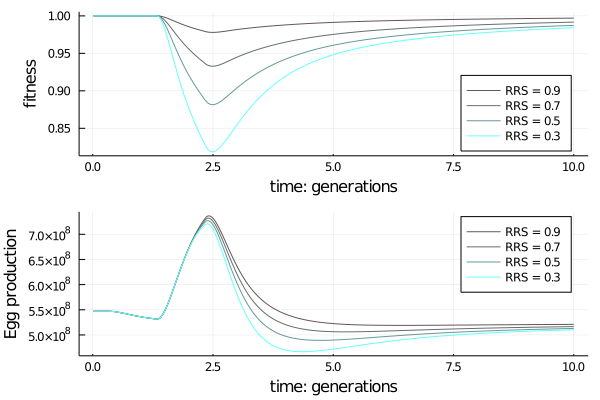

In [407]:
s = 0.1
RRS = [0.9,0.7,0.5,0.3]
k_ind = 3
R_im = 0.5.* demo_params.Smyth_16_R_star
n_k = length(RRS)
duratation = 1
W,E = simulaiton(R_im, duratation, s, RRS[1], k_ind)
N = length(W)
col = i -> RRS[n_k]/RRS[i]
p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(1),col(1)),
                xlab = "time: generations", ylab = "fitness", 
                label = string("RRS = ", RRS[1]))
p2 = Plots.plot((1:N) ./ T_ ,E, color = RGB(0.4,col(1),col(1)), 
                xlab = "time: generations", ylab = "Egg production", 
                label = string("RRS = ", RRS[1]))

for i in 2:n_k
    W,E = simulaiton(R_im, duratation, s, RRS[i], k_ind)
    N = length(W)
    Plots.plot!(p1,(1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(i),col(i)),
                    xlab = "time: generations", ylab = "fitness", 
                    label = string("RRS = ", RRS[i]), legend =:bottomright)
    Plots.plot!(p2,(1:N) ./ T_ ,E, color = RGB(0.4,col(i),col(i)), 
                    xlab = "time: generations", ylab = "Egg production", 
                    label = string("RRS = ", RRS[i]))
end 
plot(p1,p2, layout = (2, 1))

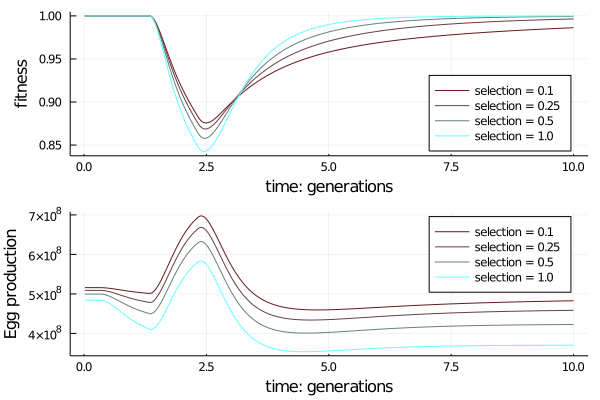

In [395]:
s = [0.1,0.25,0.5,1.0]
RRS = 0.5
k_ind = 3
R_im = 0.5 .* demo_params.Smyth_16_R_star
n_k = length(s)
duratation = 1
W,E = simulaiton(R_im, duratation, s[1], RRS, k_ind)
N = length(W)
col = i -> s[i]/s[n_k]
lab = i -> string("selection = ", s[i])
p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(1),col(1)),
                xlab = "time: generations", ylab = "fitness", 
                label = lab(1))
p2 = Plots.plot((1:N) ./ T_ ,E, color = RGB(0.4,col(1),col(1)), 
                xlab = "time: generations", ylab = "Egg production", 
                label = lab(1))

for i in 2:n_k
    W,E = simulaiton(R_im, duratation, s[i], RRS, k_ind)
    N = length(W)
    Plots.plot!(p1,(1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(i),col(i)),
                    xlab = "time: generations", ylab = "fitness", 
                    label = lab(i), legend =:bottomright)
    Plots.plot!(p2,(1:N) ./ T_ ,E , color = RGB(0.4,col(i),col(i)), 
                    xlab = "time: generations", ylab = "Egg production", 
                    label = lab(i))
end 
plot(p1,p2, layout = (2, 1))

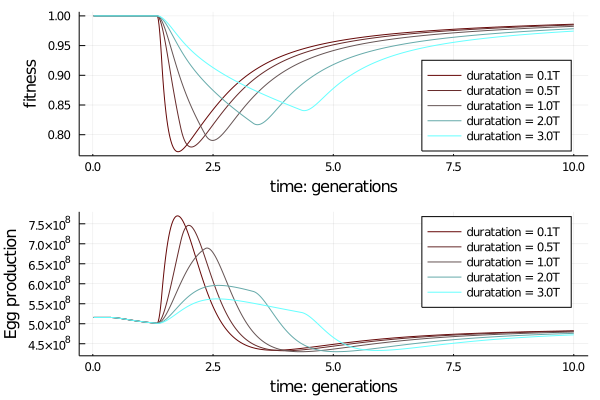

In [396]:
s = 0.1
RRS = 0.25
k_ind = 3
duratation = [0.1,0.5,1,2,3]
R_im = 0.5 .* demo_params.Smyth_16_R_star ./ duratation 

n_k = length(R_im)
W,E = simulaiton(R_im[1], duratation[1], s, RRS, k_ind)
N = length(W)
col = i -> duratation[i]/duratation[n_k]
lab = i -> string("duratation = ", duratation[i], "T")

p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(1),col(1)),
                xlab = "time: generations", ylab = "fitness", 
                label = lab(1))
p2 = Plots.plot((1:N) ./ T_ ,E, color = RGB(0.4,col(1),col(1)), 
                xlab = "time: generations", ylab = "Egg production", 
                label = lab(1))

for i in 2:n_k
    W,E = simulaiton(R_im[i], duratation[i], s, RRS, k_ind)
    N = length(W)
    Plots.plot!(p1,(1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(i),col(i)),
                    xlab = "time: generations", ylab = "fitness", 
                    label = lab(i), legend =:bottomright)
    Plots.plot!(p2,(1:N) ./ T_ ,E , color = RGB(0.4,col(i),col(i)), 
                    xlab = "time: generations", ylab = "Egg production", 
                    label = lab(i))
end 
plot(p1,p2, layout = (2, 1))

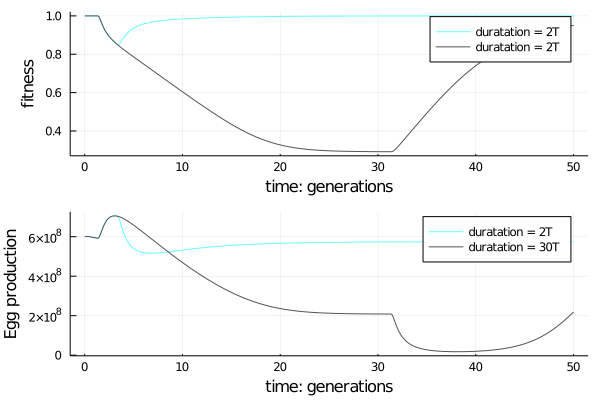

GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP


In [413]:
s = 0.1
RRS = 0.25
k_ind = 1
duratation = [2, 30]
R_im = 0.25 .* demo_params.Smyth_16_R_star

n_k = length(R_im)
W,E = simulaiton_long(R_im, duratation[1], s, RRS, k_ind)

col = i -> duratation[i]/duratation[n_k]
lab = i -> string("duratation = ", duratation[i], "T")
N = length(W)
p1 = Plots.plot((1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(1),col(1)),
                xlab = "time: generations", ylab = "fitness", 
                label = lab(1))
p2 = Plots.plot((1:N) ./ T_ ,E, color = RGB(0.4,col(1),col(1)), 
                xlab = "time: generations", ylab = "Egg production", 
                label = lab(1))
n_k = length(R_im)
W,E = simulaiton_long(R_im, duratation[2], s, RRS, k_ind)
N = length(W)

Plots.plot!(p1, (1:N) ./ T_ ,W./W[T_] , color = RGB(0.4,col(2),col(2)),
                xlab = "time: generations", ylab = "fitness", 
                label = lab(1))
Plots.plot!(p2, (1:N) ./ T_ ,E, color = RGB(0.4,col(2),col(2)), 
                xlab = "time: generations", ylab = "Egg production", 
                label = lab(2))

plot(p1,p2, layout = (2, 1))